In [1]:
from lib.xgta import Xgta
import connection_psql as creds
xgta = Xgta(creds=creds)

Begin Initialization
  If nessesary, download database tables.
  Connect to downloaded tables.
  Ensure common statistics are cached.
Initialization Completed


------

Calculate frequencey of tweets per day that contain certain (case insensitive) keywords with:

```python
r1 = xgta.frequency_of_tweets_per_day_containing(keywords)
```

The `keywords` variable is case insensitive and performs a regex search. Stringing multiple keywords together is possible with the `|`-Operator.

For example, tweets contianing the words "Rassismus" and / or "Diskriminierung" use the following):

In [2]:
r1 = xgta.frequency_of_tweets_per_day_containing("rassismus|diskriminierung")

The returned object (in the example above `r1`) contains the `Polars.DataFrame` as `.df` (e.g., `r1.df`) and a method `.plot_frequency_of()` to plot a timeseries of the dataframe.

In [3]:
r1.df # Returns the DataFrame itself

shape: (1_622, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ postdate  ┆ search_te ┆ search_te ┆ search_te ┆ … ┆ percent:i ┆ all_tweet ┆ is_retwee ┆ is_origi │
│ ---       ┆ rm:all_tw ┆ rm:is_ret ┆ rm:is_ori ┆   ┆ s_origina ┆ s         ┆ t         ┆ nal_twee │
│ date      ┆ eets      ┆ weet      ┆ ginal_twe ┆   ┆ l_tweet   ┆ ---       ┆ ---       ┆ t        │
│           ┆ ---       ┆ ---       ┆ et        ┆   ┆ ---       ┆ u32       ┆ u32       ┆ ---      │
│           ┆ u32       ┆ u32       ┆ ---       ┆   ┆ f64       ┆           ┆           ┆ u32      │
│           ┆           ┆           ┆ u32       ┆   ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2018-10-0 ┆ 47        ┆ 23        ┆ 24        ┆ … ┆ 0.002085  ┆ 17576     ┆ 6063      ┆ 11513    │
│ 5         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2018-10-0 ┆ 0         ┆ 0         ┆ 0         ┆ … ┆ 0.0       ┆ 0         ┆ 0         ┆ 0        │
│ 6         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2018-10-0 ┆ 0         ┆ 0         ┆ 0         ┆ … ┆ 0.0       ┆ 0         ┆ 0         ┆ 0        │
│ 7         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2018-10-0 ┆ 1409      ┆ 762       ┆ 647       ┆ … ┆ 0.001161  ┆ 850547    ┆ 293268    ┆ 557279   │
│ 8         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 2023-03-1 ┆ 1906      ┆ 716       ┆ 1190      ┆ … ┆ 0.001254  ┆ 1380363   ┆ 431206    ┆ 949157   │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2023-03-1 ┆ 1849      ┆ 450       ┆ 1399      ┆ … ┆ 0.001459  ┆ 1421789   ┆ 463179    ┆ 958610   │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2023-03-1 ┆ 1796      ┆ 597       ┆ 1199      ┆ … ┆ 0.001252  ┆ 1433814   ┆ 476229    ┆ 957585   │
│ 3         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2023-03-1 ┆ 2028      ┆ 733       ┆ 1295      ┆ … ┆ 0.001308  ┆ 1463171   ┆ 473399    ┆ 989772   │
│ 4         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

['rassismus|diskriminierung']


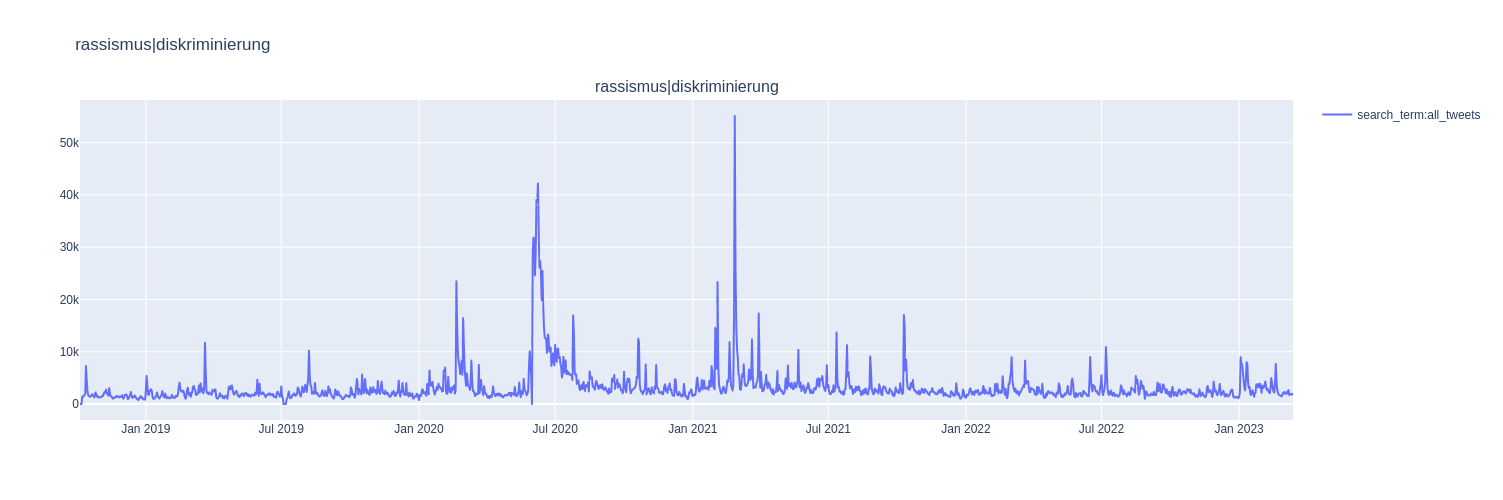

In [4]:
r1.plot_frequency_of(['search_term:all_tweets']) # Plots a timeseries of all tweets fitting the search criteria.

It is also possibel to plot multiple columns of the DataFrame in one figure. (Uncomment or comment with `#`)

['rassismus|diskriminierung', 'rassismus|diskriminierung']


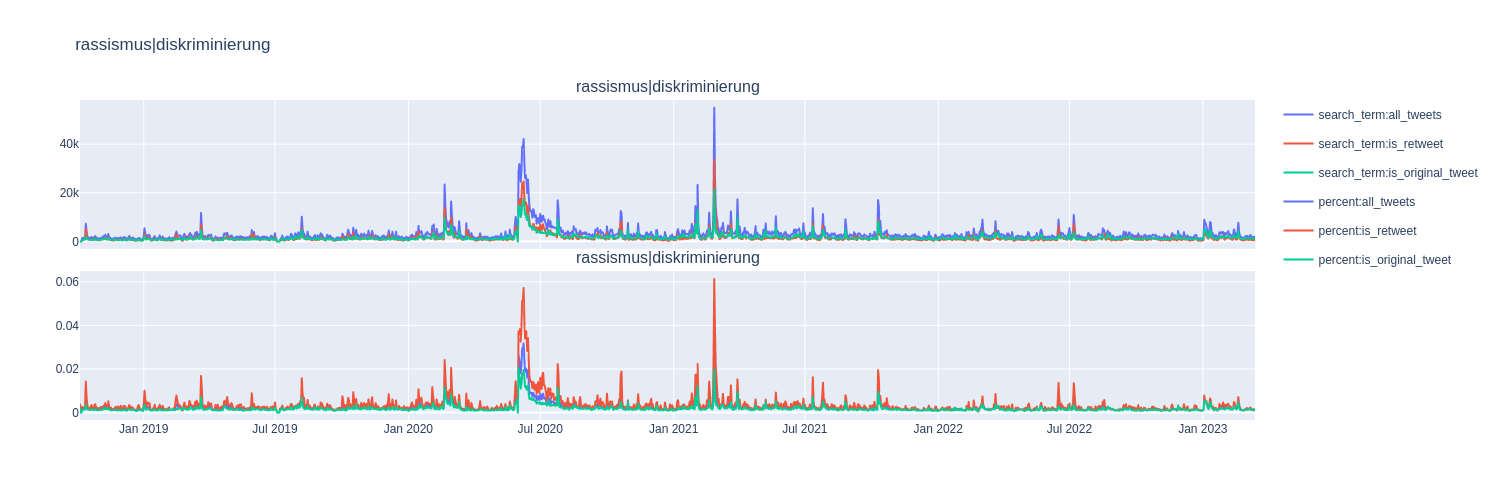

In [5]:
r1.plot_frequency_of([
    'search_term:all_tweets',
    'search_term:is_retweet',
    'search_term:is_original_tweet',
    'percent:all_tweets',
    'percent:is_retweet',
    'percent:is_original_tweet',
    # 'all_tweets',
    # 'is_retweet',
    # 'is_original_tweet',
])

Plots are interactive: 

- Deselect columns by clicking on the ledgend.
- Draw rectangles to zoom in.
- Double click to reset plots to their default view.

---

To keep previous results, and search for new terms, add save results in a new return-object, e.g., `r2`:

['krise']


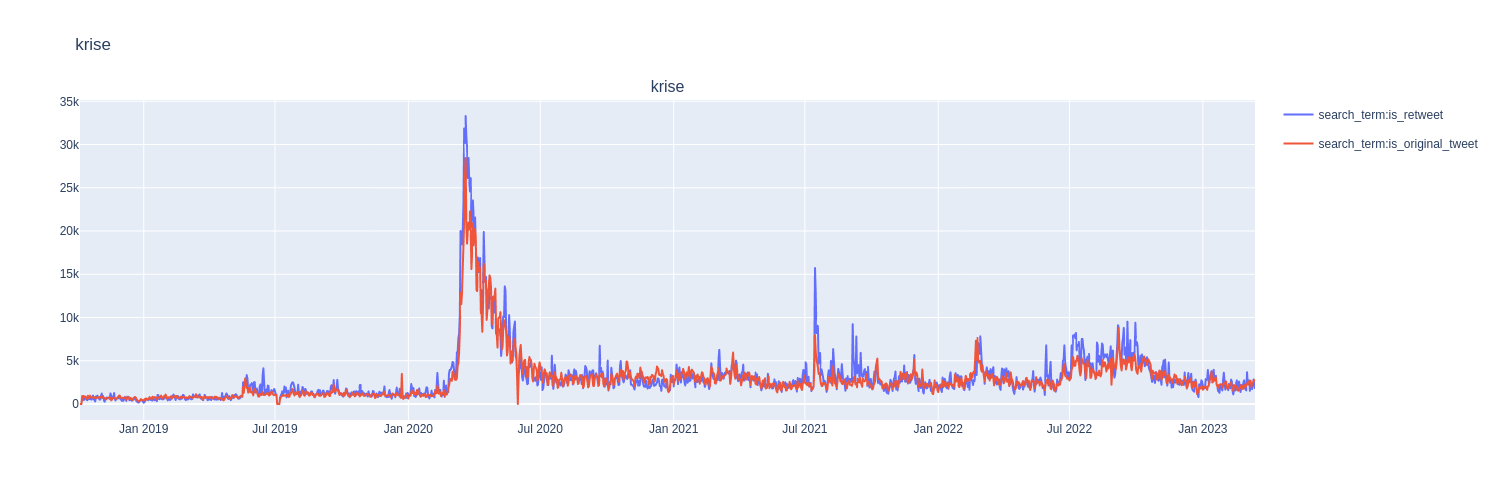

shape: (9, 11)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ describe  ┆ postdate  ┆ search_te ┆ search_te ┆ … ┆ percent:i ┆ all_tweet ┆ is_retwee ┆ is_origi │
│ ---       ┆ ---       ┆ rm:all_tw ┆ rm:is_ret ┆   ┆ s_origina ┆ s         ┆ t         ┆ nal_twee │
│ str       ┆ str       ┆ eets      ┆ weet      ┆   ┆ l_tweet   ┆ ---       ┆ ---       ┆ t        │
│           ┆           ┆ ---       ┆ ---       ┆   ┆ ---       ┆ f64       ┆ f64       ┆ ---      │
│           ┆           ┆ f64       ┆ f64       ┆   ┆ f64       ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 1622      ┆ 1622.0    ┆ 1622.0    ┆ … ┆ 1622.0    ┆ 1622.0    ┆ 1622.0    ┆ 1622.0   │
│ null_coun ┆ 0         ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ t         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mean      ┆ null      ┆ 5899.1670 ┆ 3071.4691 ┆ … ┆ 0.003127  ┆ 1.3023e6  ┆ 442167.38 ┆ 860175.5 │
│           ┆           ┆ 78        ┆ 74        ┆   ┆           ┆           ┆ 1011      ┆ 50555    │
│ std       ┆ null      ┆ 6145.1255 ┆ 3413.5672 ┆ … ┆ 0.003034  ┆ 255944.98 ┆ 92336.613 ┆ 173834.9 │
│           ┆           ┆ 17        ┆ 64        ┆   ┆           ┆ 428       ┆ 513       ┆ 7202     │
│ min       ┆ 2018-10-0 ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│           ┆ 5         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 25%       ┆ null      ┆ 2547.0    ┆ 1336.0    ┆ … ┆ 0.001705  ┆ 1.063235e ┆ 369352.0  ┆ 686347.0 │
│           ┆           ┆           ┆           ┆   ┆           ┆ 6         ┆           ┆          │
│ 50%       ┆ null      ┆ 4850.0    ┆ 2389.0    ┆ … ┆ 0.00248   ┆ 1.355328e ┆ 439104.0  ┆ 914656.0 │
│           ┆           ┆           ┆           ┆   ┆           ┆ 6         ┆           ┆          │
│ 75%       ┆ null      ┆ 6587.0    ┆ 3375.0    ┆ … ┆ 0.003316  ┆ 1.495502e ┆ 507348.0  ┆ 990903.0 │
│           ┆           ┆           ┆           ┆   ┆           ┆ 6         ┆           ┆          │
│ max       ┆ 2023-03-1 ┆ 61736.0   ┆ 33303.0   ┆ … ┆ 0.027918  ┆ 1.985733e ┆ 843918.0  ┆ 1.230845 │
│           ┆ 4         ┆           ┆           ┆   ┆           ┆ 6         ┆           ┆ e6       │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [6]:
r2 = xgta.frequency_of_tweets_per_day_containing("krise")
r2.plot_frequency_of(['search_term:is_retweet','search_term:is_original_tweet'])
r2.df.describe()

Compare multiple results with each other:

['rassismus|diskriminierung', 'krise']


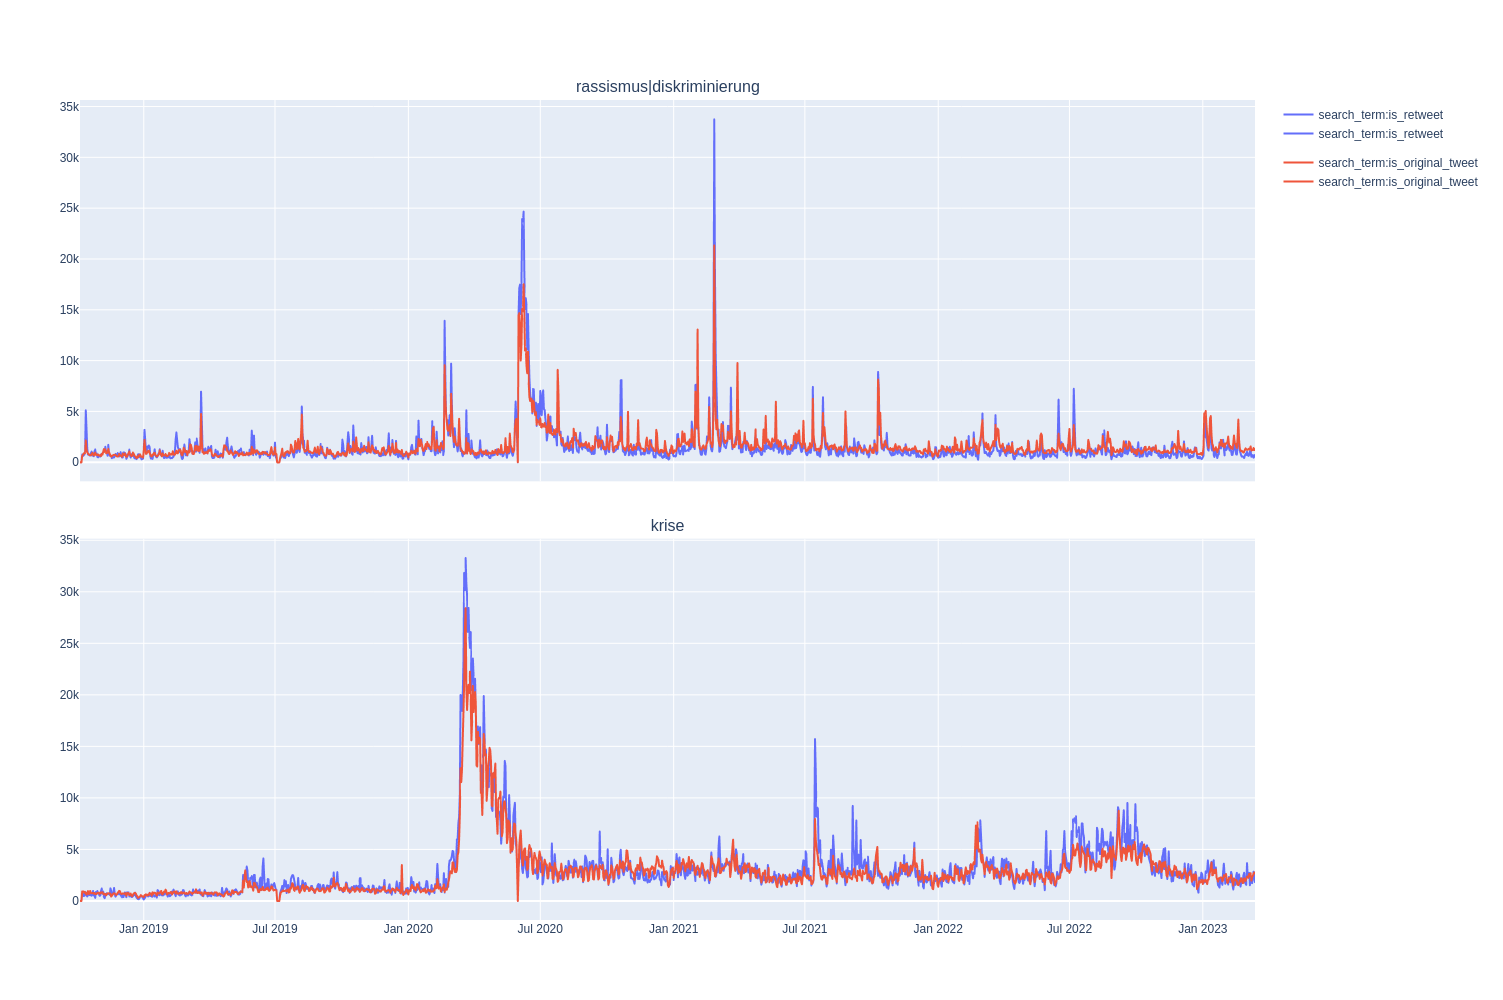

In [7]:
xgta.plot_frequency_of(
    results=[r1, r2], # Two or more results in an array []
    plot=[
        'search_term:is_retweet',
        'search_term:is_original_tweet',
    ],
    shared_xaxes=True, # Optional
    shared_yaxes=True, # Optional
)